In [1]:
import numpy as np
import os
import pandas as pd
import numpy as np
import glob
import plotnine as gg
import re
from plotnine import *
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
from plydata import *
from sklearn.neighbors.kde import KernelDensity


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
figpath = "../Figures/Quality_Control/onetissue/"

### Paths of Data and Annotations

In [ ]:
def fileslist_1():
    base = '../data/ExpPHa08_PositiveNegativeControlROIs/Neg_onetissue/'
    datacsvs = os.listdir(base)
    flist = []
    for f in datacsvs:
        if f.endswith('_obj.csv'):
            fpath = os.path.join(base, f)
            flist.append(fpath)
    return flist

def fileslist_2():
    base = '../data/ExpPHa08_PositiveNegativeControlROIs/Pos_onetissue/'
    datacsvs = os.listdir(base)
    flist = []
    for f in datacsvs:
        if f.endswith('_obj.csv'):
            fpath = os.path.join(base, f)
            flist.append(fpath)
    return flist



flist_1 = fileslist_1()
flist_2 = fileslist_2()
flist_1



fpath_1 = flist_1[0]
fpath_2 = flist_2[0]
print(fpath_1)
print(fpath_2)

prf_1 = pd.read_csv(fpath_1)
prf_2 = pd.read_csv(fpath_2)

ch = 4
channel_mean = "Intensity_MeanIntensity_R_ch" + str(ch)
channel_max = "Intensity_MaxIntensity_R_ch" + str(ch)


columns = ['ImageNumber', 'ObjectNumber', 
           'AreaShape_Area', 'Intensity_MeanIntensity_R_ch'+str(ch), 
           'Intensity_MaxIntensity_R_ch'+str(ch)]

data_1 = prf_1.loc[:, columns]
data_1['Condition'] = "Negative"
data_2 = prf_2.loc[:, columns]
data_2['Condition'] = "Positive"
data_1.head()

data = pd.concat([data_1, data_2])


### Mean Intensities

In [100]:
data_1_meanI_mean = round(np.mean(data_1[channel_mean]), 3)
data_1_maxI_mean = round(np.mean(data_1[channel_max]), 3)

data_2_meanI_mean = round(np.mean(data_2[channel_mean]), 3)
data_2_maxI_mean = round(np.mean(data_2[channel_max]), 3)


In [101]:
import random

thr = round(data_1[channel_mean].quantile(0.95), 3)
thr

0.103

### Median Intensities

In [102]:
data_1_meanI_median = round(np.median(data_1[channel_mean]), 3)
data_1_maxI_median= round(np.median(data_1[channel_max]), 3)


data_2_meanI_median = round(np.median(data_2[channel_mean]), 3)
data_2_maxI_median= round(np.median(data_2[channel_max]), 3)

data_1_meanI_median

0.067

### Standard Deviantion

In [103]:
data_1_meanI_std = round(np.std(data_1[channel_mean]), 3)
data_1_maxI_std= round(np.std(data_1[channel_max]), 3)

data_2_meanI_std = round(np.std(data_2[channel_mean]), 3)
data_2_maxI_std= round(np.std(data_2[channel_max]), 3)


## Plotting MeanI

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures/Quality_Control/combined/MaxI_ch4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


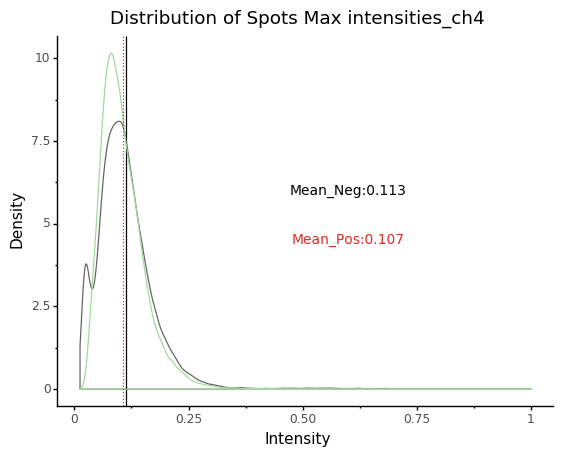

<ggplot: (296911692)>

In [104]:
g = (ggplot()
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_1, color="#636363",  alpha=.2, show_legend=False)
    + geom_vline(xintercept= data_1_maxI_mean, color="#000000")
    + annotate("text", label = "Mean_Neg:" + str(data_1_maxI_mean), color="#000000", size = 10, x = 0.6, y = 6)
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_2, color="#a1d99b",  alpha=.2, show_legend=False)
    + annotate("text", label = "Mean_Pos:" + str(data_2_maxI_mean), color="#de2d26", size = 10, x = 0.6, y = 4.5)
    + geom_vline(xintercept= data_2_maxI_mean, color="#de2d26", linetype="dotted", size=0.5)
    + xlab("Intensity")
    + ylab("Density") 
    + labs(title= "Distribution of Spots Max intensities_ch" + str(ch))
    
    )

g = g + theme_classic()


ggsave(filename='MaxI_ch' + str(ch) + ".png", plot = g, 
       path = figpath)


g


## Plotting Median Intensity

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures/Quality_Control/combined/MaxI_ch4median.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


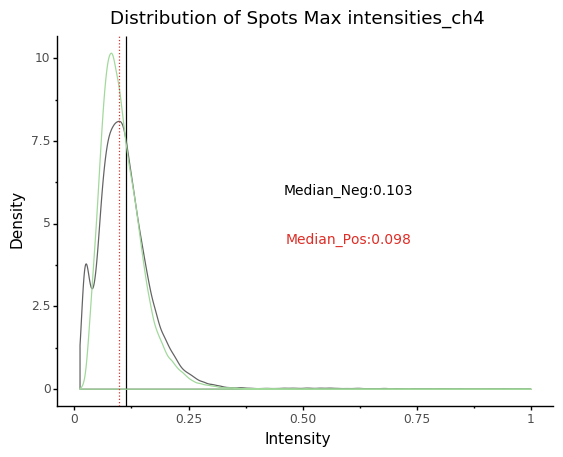

<ggplot: (299214195)>

In [105]:
g = (ggplot()
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_1, color="#636363",  alpha=.2, show_legend=False)
    + geom_vline(xintercept= data_1_maxI_mean, color="#000000")
    + annotate("text", label = "Median_Neg:" + str(data_1_maxI_median), color="#000000", size = 10, x = 0.6, y = 6)
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_2, color="#a1d99b",  alpha=.2, show_legend=False)
    + annotate("text", label = "Median_Pos:" + str(data_2_maxI_median), color="#de2d26", size = 10, x = 0.6, y = 4.5)
    + geom_vline(xintercept= data_2_maxI_median, color="#de2d26", linetype="dotted", size=0.5)
    + xlab("Intensity")
    + ylab("Density") 
    + labs(title= "Distribution of Spots Max intensities_ch" + str(ch))
    
    )

g = g + theme_classic()


ggsave(filename='MaxI_ch' + str(ch) + "median.png", plot = g, 
       path = figpath)


g



## Plotting MeanI

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures/Quality_Control/combined/MeanI_ch4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


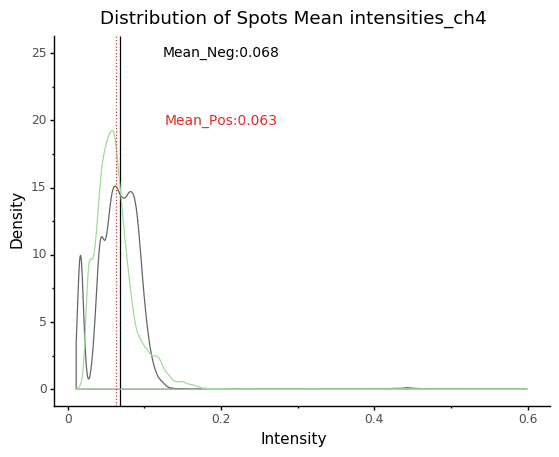

<ggplot: (298681230)>

In [106]:
g = (ggplot()
    + geom_density(aes(x=channel_mean, y='stat(density)'),data= data_1, color="#636363",  alpha=.2, show_legend=False)
    + geom_vline(xintercept= data_1_meanI_mean, color="#000000")
    + annotate("text", label = "Mean_Neg:" + str(data_1_meanI_mean), color="#000000", size = 10, x = 0.2, y = 25)
    + geom_density(aes(x=channel_mean, y='stat(density)'),data= data_2, color="#a1d99b",  alpha=.2, show_legend=False)
    + annotate("text", label = "Mean_Pos:" + str(data_2_meanI_mean), color="#de2d26", size = 10, x = 0.2, y = 20)
    + geom_vline(xintercept= data_2_meanI_mean, color="#de2d26", linetype="dotted", size=0.5)
    + xlab("Intensity")
    + ylab("Density") 
    + labs(title= "Distribution of Spots Mean intensities_ch" + str(ch))
    
    )

g = g + theme_classic()

ggsave(filename='MeanI_ch' + str(ch) + ".png", plot = g, 
       path = figpath)



g

g

## Plotting MedianI

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures/Quality_Control/combined/MaxI_ch4median.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


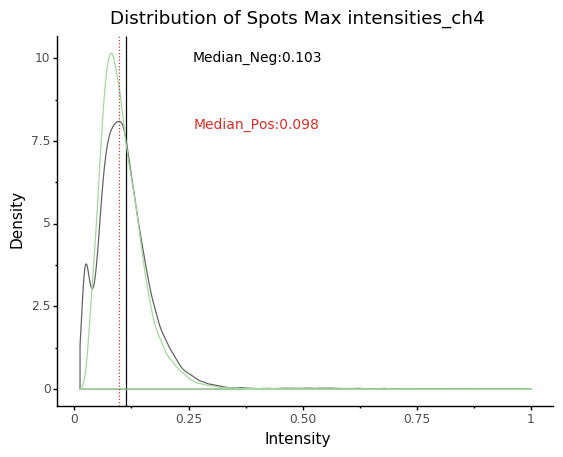

<ggplot: (297232415)>

In [107]:
g = (ggplot()
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_1, color="#636363",  alpha=.2, show_legend=False)
    + geom_vline(xintercept= data_1_maxI_mean, color="#000000")
    + annotate("text", label = "Median_Neg:" + str(data_1_maxI_median), color="#000000", size = 10, x = 0.4, y = 10)
    + geom_density(aes(x=channel_max, y='stat(density)'),data= data_2, color="#a1d99b",  alpha=.2, show_legend=False)
    + annotate("text", label = "Median_Pos:" + str(data_2_maxI_median), color="#de2d26", size = 10, x = 0.4, y = 8)
    + geom_vline(xintercept= data_2_maxI_median, color="#de2d26", linetype="dotted", size=0.5)
    + xlab("Intensity")
    + ylab("Density") 
    + labs(title= "Distribution of Spots Max intensities_ch" + str(ch))
    
    )

g = g + theme_classic()


ggsave(filename='MaxI_ch' + str(ch) + "median.png", plot = g, 
       path = figpath)


g